<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


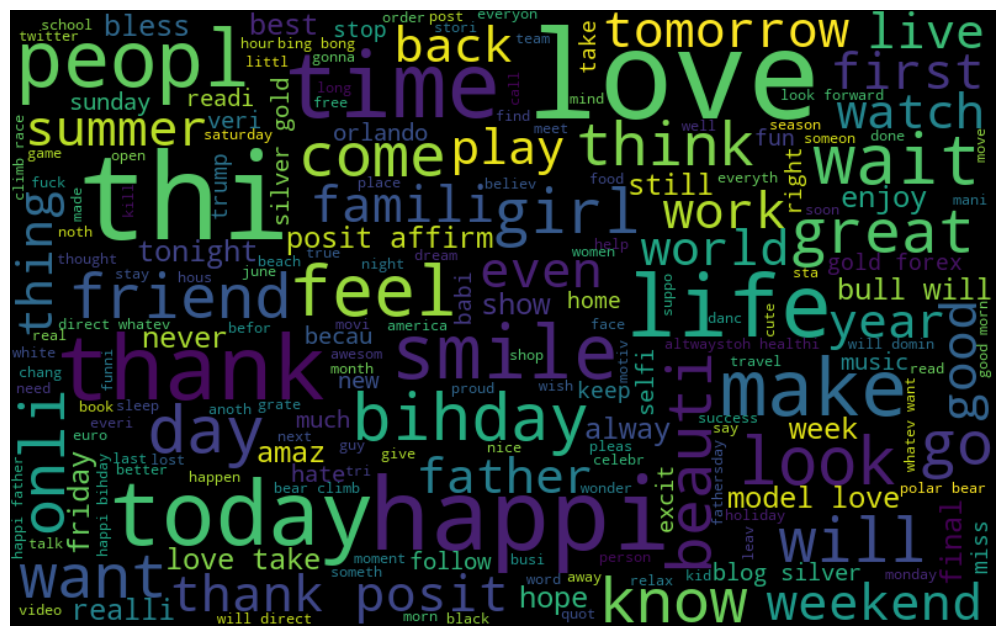

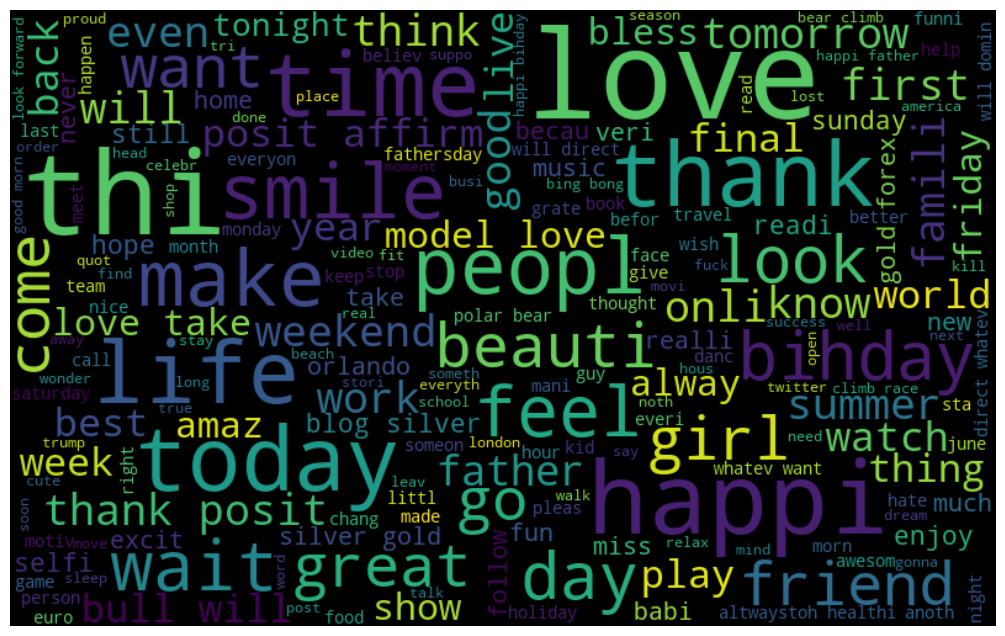

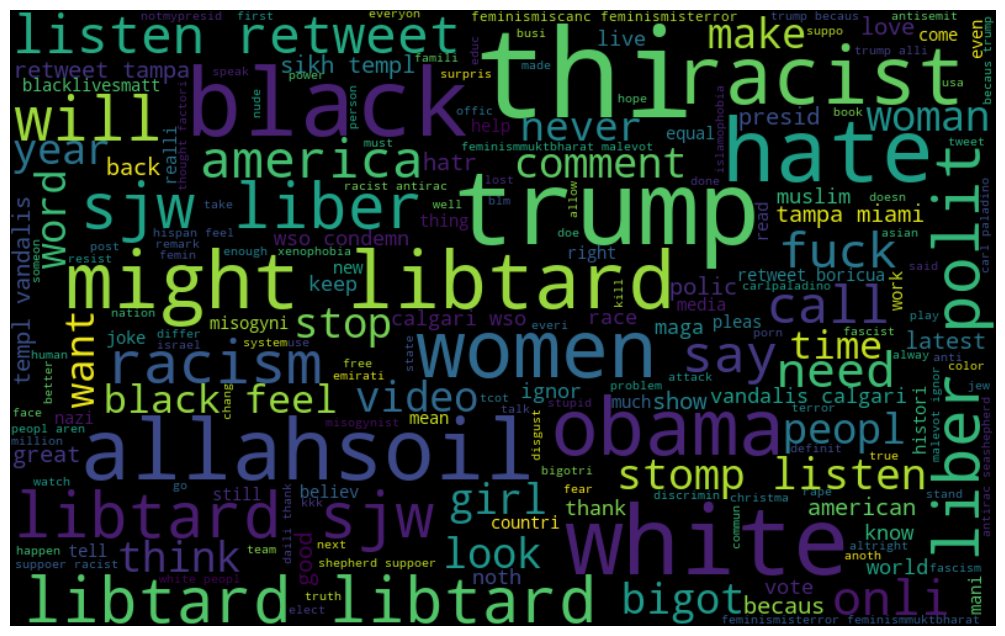

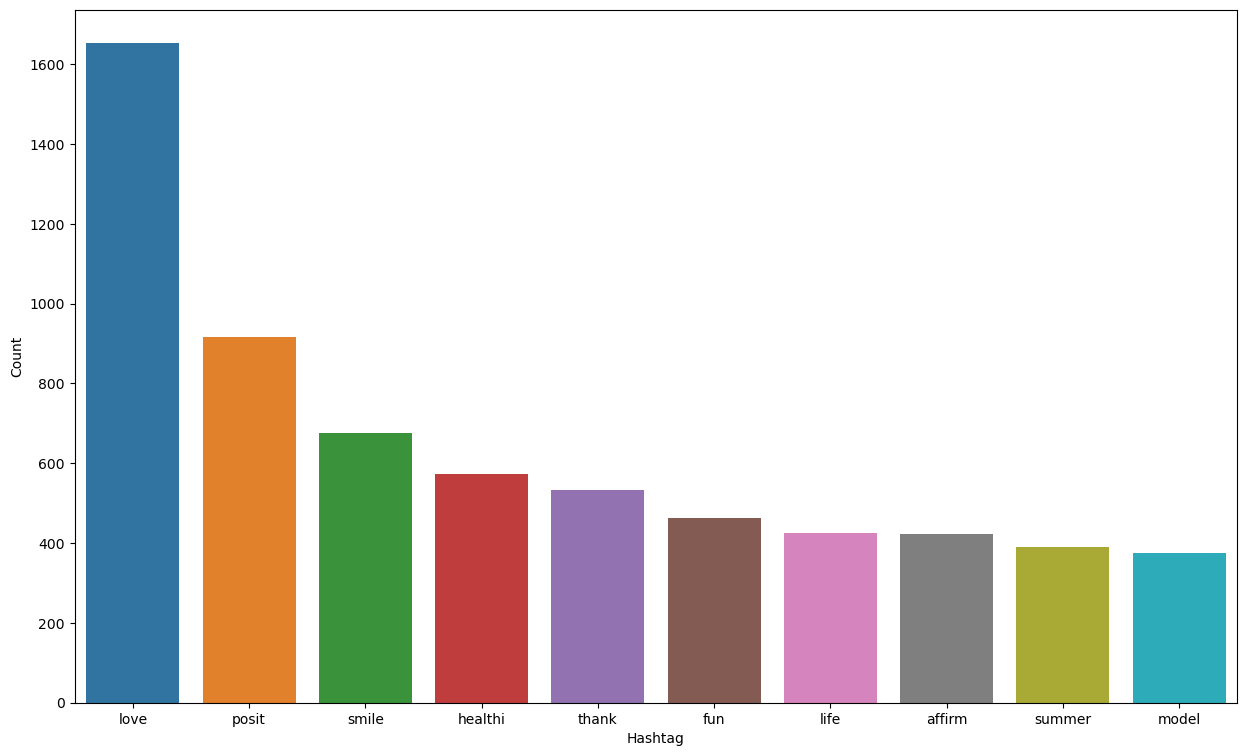

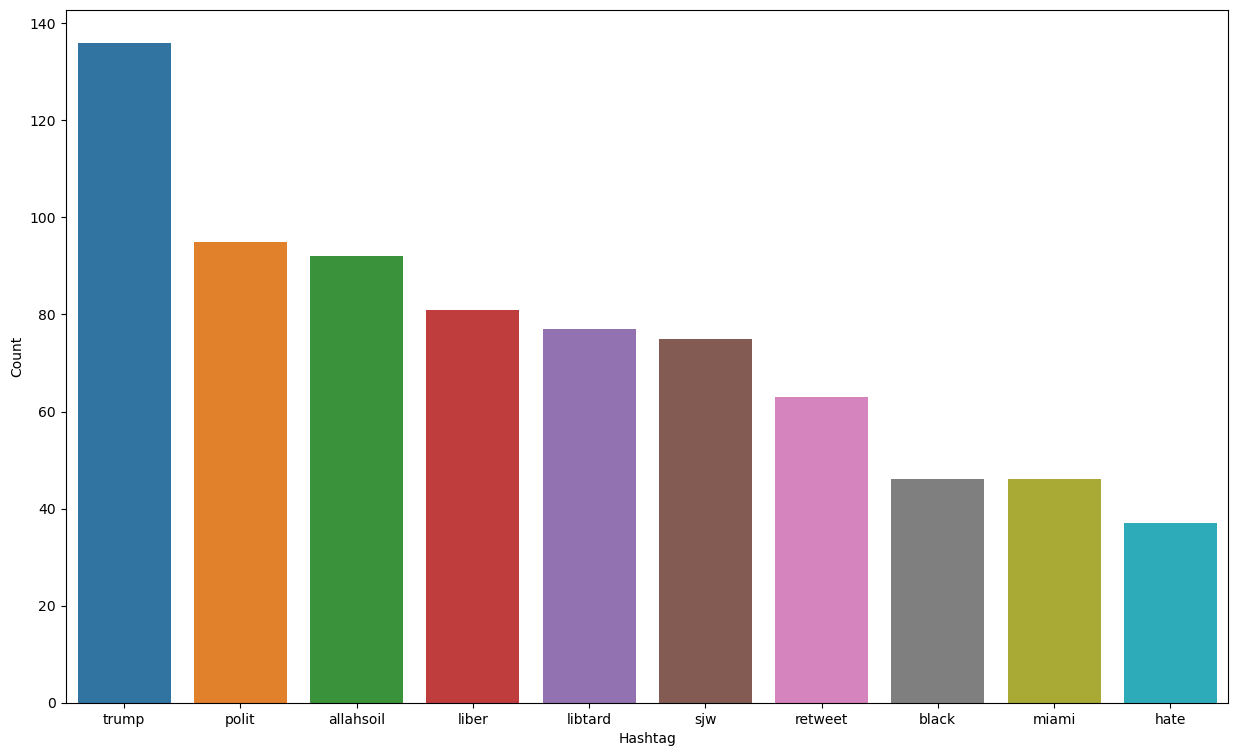

0.9469403078463271

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings

# This magic command is specific to Jupyter Notebook and JupyterLab
%matplotlib inline

warnings.filterwarnings('ignore')

# Now you can read the CSV file
df = pd.read_csv('Twitter Sentiments.csv')
df.head()
df.info()
# removes pattern in the input text
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
df.head()
# remove twitter handles (@user)
df['clean_tweet'] = np.vectorize(remove_pattern)(df['tweet'], "@[\w]*")
df.head()
# remove special characters, numbers and punctuations
df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z#]", " ")
df.head()
# remove short words
df['clean_tweet'] = df['clean_tweet'].apply(lambda x: " ".join([w for w in x.split() if len(w)>3]))
df.head()
# individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()
# stem the words
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()
# combine words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df['clean_tweet'] = tokenized_tweet
df.head()
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# frequent words visualization for -ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags    
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])
ht_positive[:5]
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])
ht_positive[:5]
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['clean_tweet'])
#bow[0].toarray()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['label'], random_state=42, test_size=0.25)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
# training
model = LogisticRegression()
model.fit(x_train, y_train)
# testing
pred = model.predict(x_test)
f1_score(y_test, pred)
accuracy_score(y_test,pred)


In [27]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)
accuracy_score(y_test,pred)
pred_prob[0][1] >= 0.3

False

In [12]:

!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 1.5 MB/s eta 0:00:00a 0:00:01


In [29]:
pip install git+https://github.com/tweepy/tweepy.git

  Cloning https://github.com/tweepy/tweepy.git to /private/var/folders/87/2cbq3k094pj9zclfcr4k59600000gn/T/pip-req-build-61jyskg3
  Running command git clone --filter=blob:none --quiet https://github.com/tweepy/tweepy.git /private/var/folders/87/2cbq3k094pj9zclfcr4k59600000gn/T/pip-req-build-61jyskg3
  Resolved https://github.com/tweepy/tweepy.git to commit 91a41c6e1c955d278c370d51d5cf43b05f7cd979
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 1.3 MB/s eta 0:00:00a 0:00:01
  Created wheel for tweepy: filename=tweepy-4.14.0-py3-none-any.whl size=99204 sha256=fa9b92608ea121b05c7d544213971354fedf339f771909d643395c7ff1e7610c
  Stored in directory: /private/var/folders/87/2cbq3k094pj9zclfcr4k59600000gn/T/pip-ephem-wheel-cache-2c3rxzjn/wheels/37/db/50/af7b44cc37a83332e50fbebe7290974b5f463e294dbc4eeaf8
Successfully built tweepy
Note: you may need to restart the kernel to use updated packages.


In [31]:
import tweepy
import pandas as pd

consumer_key = "HoriRM4tOpiyg2eQPmzxy43SW"
consumer_secret = "pX7vNJjrHVxj077oKokrK4NxEmdMZ6pZRWoSkXhUOgMYfrXXSi"
access_token = "1780929605957804033-ZggmQbbO47tkdnovxM97SuTDoZfac6"
access_token_secret = "2FRzb6VkQ0LmbH1J8SBAuGdKsbbdrMzLr6E6E1MVetgFe"

# Pass in our Twitter API authentication key
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret,
    access_token, access_token_secret
)

# Instantiate the tweepy API
api = tweepy.API(auth, wait_on_rate_limit=True)

search_query = "'ref''world cup'-filter:retweets AND -filter:replies AND -filter:links"
no_of_tweets = 100

try:
    # The number of tweets we want to retrieve from the search
    tweets = api.search_tweets(q=search_query, lang="en", count=no_of_tweets, tweet_mode='extended')
    
    # Pulling some attributes from the tweet
    attributes_container = [[tweet.user.name, tweet.created_at, tweet.favorite_count, tweet.source, tweet.full_text] for tweet in tweets]

    # Creation of column list to rename the columns in the dataframe
    columns = ["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"]
    
    # Creation of Dataframe
    tweets_df = pd.DataFrame(attributes_container, columns=columns)
except BaseException as e:
    print('Status Failed On,', str(e))


Status Failed On, 403 Forbidden
453 - You currently have access to a subset of Twitter API v2 endpoints and limited v1.1 endpoints (e.g. media post, oauth) only. If you need access to this endpoint, you may need a different access level. You can learn more here: https://developer.twitter.com/en/portal/product


In [ ]:
tweets_df
     